In [9]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 한글 폰트 자동 설정 (첫 번째로 발견되는 후보 사용)
candidates = ['Malgun Gothic', 'AppleGothic', 'NanumGothic',
              'Noto Sans CJK KR', 'Noto Sans KR']
available = {f.name for f in font_manager.fontManager.ttflist}
for f in candidates:
    if f in available:
        rcParams['font.family'] = f
        break

# 마이너스 기호 깨짐 방지
rcParams['axes.unicode_minus'] = False
print("Matplotlib font:", rcParams['font.family'])

Matplotlib font: ['Malgun Gothic']


# `merged_user_data` 사용하여 EDA 시작
#### "집무실"(공유 오피스회사) 기준 근처 지하철역 거리

공덕점 (site 17)
- 주소 : 서울시 마포구 공덕동 479 공덕SK리더스뷰, 114호
- 가까운 역명 : 공덕역(5)
- 역까지의 거리(도보(m)) : 314m
- 역까지 이동 시간(편도/도보) : 5분

분당점 (site 47)
- 주소 : 경기도 성남시 분당구 수내로 39 B1F
- 가까운 역명 : 수내역(수인분당)
- 역까지의 거리(도보(m)) : 444m
- 역까지 이동 시간(편도/도보) : 7분

영등포점 (site 49)
- 주소 : 서울시 영등포구 영중로 119 리마크빌 2층
- 가까운 역명 : 영등포시장역(5)
- 역까지의 거리(도보(m)) : 458m
- 역까지 이동 시간(편도/도보) : 7분

왕십리점 (site 6)
- 주소 : 서울시 성동구 고산자로14길 26 지웰홈스 1층
- 가까운 역명 : 왕십리역(2, 5)
- 역까지의 거리(도보(m)) : 252m
- 역까지 이동 시간(편도/도보) : 3분

일산점 (site 4)
- 주소 : 고양시 일산동 중앙로 1228 KT고양타워 기계동 3층
- 가까운 역명 : 마두역(3)
- 역까지의 거리(도보(m)) : 402m
- 역까지 이동 시간(편도/도보) : 7분

정동본점 (site 1)
- 주소 : 서울 중구 세종대로19길 16 성공회빌딩 1층
- 가까운 역명 : 시청역(1)
- 역까지의 거리(도보(m)) : 109m
- 역까지 이동 시간(편도/도보) : 1분

서울대점 (폐점, site 2)
- 주소 : 서울특별시 관악구 관악로 144 우남네오폴리스 2층
- 가까운 역명 : 서울대입구역(2)
- 역까지의 거리(도보(m)) : 352m
- 역까지 이동 시간(편도/도보) : 5분

석촌점 (폐점, site 3)
- 주소 : 서울특별시 송파구 송파대로 403
- 가까운 역명 : 석촌역(8, 9)
- 역까지의 거리(도보(m)) : 226m
- 역까지 이동 시간(편도/도보) : 3분

목동점 (폐점, site 5)
- 주소 : 서울 양천구 신목로 59
- 가까운 역명 : 오목교역(5)
- 역까지의 거리(도보(m)) : 436m
- 역까지 이동 시간(편도/도보) : 6분

In [2]:
df = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\merged_user_data_2.csv")

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2021,6,22,2,1.0,1.0,0,6689.229446,0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2021,6,23,2,3.0,3.0,1,85811.532606,0,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2021,6,19,2,3.0,3.0,0,14505.346647,0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2021,6,17,2,1.0,1.0,0,13084.318509,0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,2021,7,16,3,1.0,1.0,0,7617.656856,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,2024,1,23,0,12.0,12.0,1,29221.687353,1,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,3.0,3.0,1,3359.131767,1,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,6.0,6.0,0,16514.422450,1,0
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,2024,1,18,0,3.0,3.0,0,11977.273214,1,0


In [3]:
# 거리(m)와 도보시간(분) 매핑
site_info = {
    1: {"distance_m": 109, "walk_min": 1},   # 정동본점
    2: {"distance_m": 352, "walk_min": 5},   # 서울대점 (폐점)
    3: {"distance_m": 226, "walk_min": 3},   # 석촌점 (폐점)
    4: {"distance_m": 402, "walk_min": 7},   # 일산점
    5: {"distance_m": 436, "walk_min": 6},   # 목동점 (폐점)
    6: {"distance_m": 252, "walk_min": 3},   # 왕십리점
    17: {"distance_m": 314, "walk_min": 5},  # 공덕점
    47: {"distance_m": 444, "walk_min": 7},  # 분당점
    49: {"distance_m": 458, "walk_min": 7}   # 영등포점
}

In [4]:
# 거리 추가
df["subway_distance_m"] = df["last_site_id"].map(
    lambda x: site_info.get(x, {}).get("distance_m")
)

# 도보시간 추가
df["subway_walk_min"] = df["last_site_id"].map(
    lambda x: site_info.get(x, {}).get("walk_min")
)

df

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site,subway_distance_m,subway_walk_min
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,22,2,1.0,1.0,0,6689.229446,0,0,226,3
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,23,2,3.0,3.0,1,85811.532606,0,0,226,3
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,19,2,3.0,3.0,0,14505.346647,0,0,402,7
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,17,2,1.0,1.0,0,13084.318509,0,0,226,3
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,16,3,1.0,1.0,0,7617.656856,0,0,352,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,23,0,12.0,12.0,1,29221.687353,1,1,252,3
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,18,0,3.0,3.0,1,3359.131767,1,1,402,7
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,18,0,6.0,6.0,0,16514.422450,1,0,444,7
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,18,0,3.0,3.0,0,11977.273214,1,0,226,3


In [5]:
# # CSV 저장 (UTF-8 인코딩)
# df.to_csv("EDA_data.csv", index=False, encoding="utf-8-sig")

---

## EDA 시작

In [6]:
df.shape

(5482, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482 entries, 0 to 5481
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_uuid                5482 non-null   object 
 1   last_site_id             5482 non-null   int64  
 2   area_pyeong              5482 non-null   int64  
 3   stay_time_second_total   5482 non-null   float64
 4   trial_day                5482 non-null   int64  
 5   trial_gap                5482 non-null   int64  
 6   first_trial_date         5482 non-null   object 
 7   first_trial_covid_level  5482 non-null   int64  
 8   start_trial_year         5482 non-null   int64  
 9   start_trial_month        5482 non-null   int64  
 10  start_trial_hour         5482 non-null   int64  
 11  start_trial_day_of_week  5482 non-null   int64  
 12  last_trial_date          5482 non-null   object 
 13  last_trial_covid_level   5482 non-null   int64  
 14  final_trial_year        

In [8]:
df.describe()

,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_covid_level,start_trial_year,start_trial_month,start_trial_hour,start_trial_day_of_week,...,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site,subway_distance_m,subway_walk_min
count,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,...,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.000000,5482.00000
mean,7.785480,111.829624,37637.786735,1.752463,0.938891,0.458774,2022.166727,7.278366,13.240606,2.763408,...,17.539767,3.058373,5.113827,4.999818,0.368114,19661.153967,0.354798,0.034112,292.720540,4.08081
std,11.930588,42.220671,36615.161740,0.783786,0.641354,0.773251,0.774009,3.455644,4.149189,1.790431,...,4.526994,1.796798,4.489217,4.416283,0.482336,13958.715407,0.478496,0.181532,102.514376,1.83696
min,1.000000,50.000000,9.481756,1.000000,0.000000,0.000000,2021.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.481756,0.000000,0.000000,109.000000,1.00000
25%,2.000000,50.000000,11839.103346,1.000000,1.000000,0.000000,2022.000000,4.000000,11.000000,1.000000,...,16.000000,2.000000,2.000000,2.000000,0.000000,9378.256206,0.000000,0.000000,226.000000,3.00000
50%,4.000000,150.000000,26199.565611,2.000000,1.000000,0.000000,2022.000000,8.000000,13.000000,3.000000,...,18.000000,3.000000,4.000000,4.000000,0.000000,17022.063475,0.000000,0.000000,252.000000,3.00000
75%,6.000000,150.000000,51197.539165,2.000000,1.000000,1.000000,2023.000000,10.000000,16.000000,4.000000,...,21.000000,4.000000,7.000000,7.000000,1.000000,26956.171901,1.000000,0.000000,352.000000,5.00000
max,49.000000,150.000000,257809.848367,3.000000,3.000000,4.000000,2024.000000,12.000000,23.000000,6.000000,...,23.000000,6.000000,40.000000,40.000000,1.000000,86399.999999,1.000000,1.000000,458.000000,7.00000


In [9]:
payment_rate = df.groupby("last_site_id")["is_payment"].mean().reset_index()
payment_rate.rename(columns={"is_payment": "payment_rate"}, inplace=True)
print(payment_rate)

   last_site_id  payment_rate
0             1      0.393072
1             2      0.331498
2             3      0.386239
3             4      0.389972
4             5      0.450094
5             6      0.340088
6            17      0.341969
7            47      0.320557
8            49      0.377049


---
---

### site별 payment 관계

In [10]:
df['last_site_id'].value_counts()

last_site_id
6     1135
3     1090
2      908
1      664
5      531
17     386
4      359
47     287
49     122
Name: count, dtype: int64

C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\1570253674.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


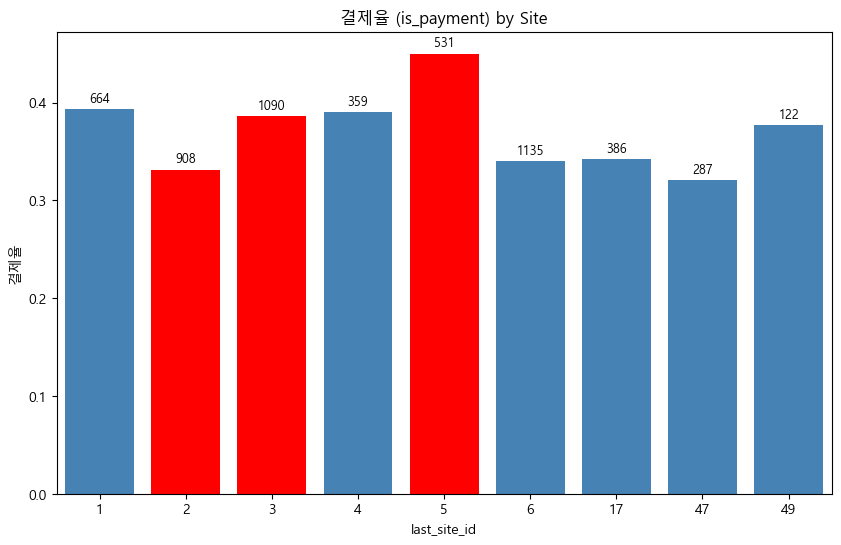

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x="last_site_id", 
    y="is_payment", 
    data=df, 
    estimator="mean", 
    ci=None,
    errorbar=None
)

# site별 샘플 수 계산 (site_id 정렬)
site_counts = df["last_site_id"].value_counts().sort_index()

# 강조할 site_id
highlight_sites = [2, 3, 5]

# 각 바에 대해 색상 변경
for i, p in enumerate(ax.patches):
    site_id = site_counts.index[i]
    if site_id in highlight_sites:
        p.set_facecolor("red")   # 강조: 붉은색
    else:
        p.set_facecolor("steelblue")  # 기본색

# 샘플 수 라벨 표시
for i, p in enumerate(ax.patches):
    count = site_counts.iloc[i]
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black',
                xytext=(0,3), textcoords='offset points')

plt.title("결제율 (is_payment) by Site")
plt.ylabel("결제율")
plt.show()

- 지점에 따라 결제율 편차가 존재함
- 표본수가 달라서 해석에서 주의가 필요함 (`site2, 3, 5는 폐점`)

---
---

### 체류 시간과 결제여부의 관계

In [12]:
df.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_date',
 'first_trial_covid_level',
 'start_trial_year',
 'start_trial_month',
 'start_trial_hour',
 'start_trial_day_of_week',
 'last_trial_date',
 'last_trial_covid_level',
 'final_trial_year',
 'final_trial_month',
 'final_trial_hour',
 'final_trial_day_of_week',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site',
 'subway_distance_m',
 'subway_walk_min']

In [13]:
df.groupby("is_payment")["stay_time_second_total"].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
is_payment,,,,,,,,
0,3464.0,38079.375884,37013.641348,9.481756,12069.725128,26724.205003,51745.570419,257809.848367
1,2018.0,36879.776422,35917.289586,11.648612,11496.386053,25228.385079,50397.668338,225148.395825


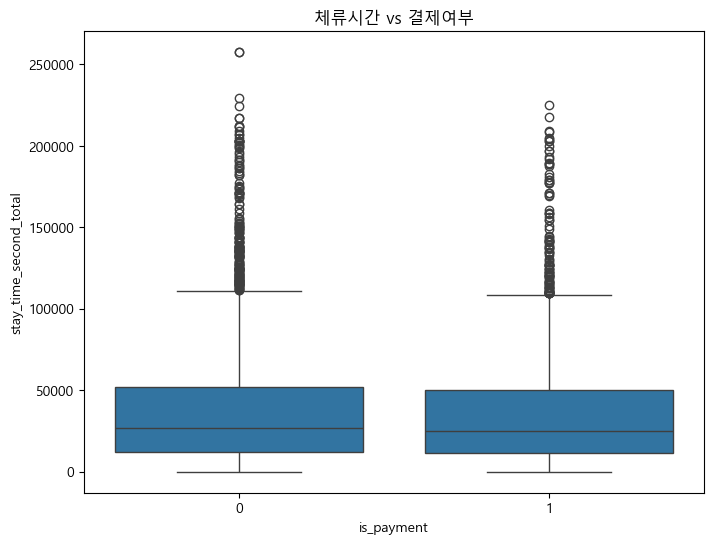

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_payment", y="stay_time_second_total", data=df)
plt.title("체류시간 vs 결제여부")
plt.show()

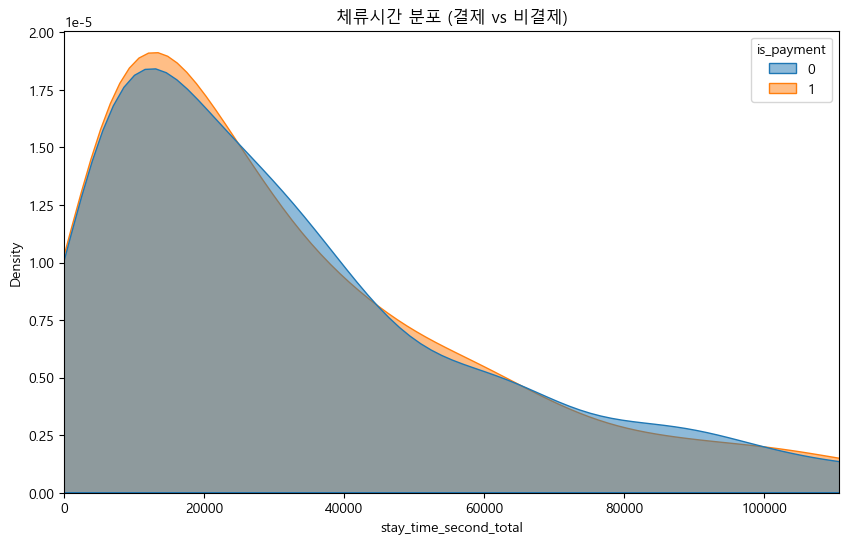

In [15]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="stay_time_second_total", hue="is_payment", fill=True, common_norm=False, alpha=0.5)
plt.title("체류시간 분포 (결제 vs 비결제)")
plt.xlim(0, df["stay_time_second_total"].quantile(0.95))  # 극단치 잘라내기
plt.show()

- 결제자(1) / 비결제자(0) 의 체류시간은 매우 유사함

---
---

### 평균 체류 시간과 결제여부와의 관계

In [16]:
df.groupby("is_payment")["avg_stay_time"].describe()

,count,mean,std,min,25%,50%,75%,max
is_payment,,,,,,,,
0,3464.0,20516.361305,14161.052207,9.481756,10153.790765,18099.676921,28371.917858,86399.999999
1,2018.0,18193.146921,13481.896455,11.648612,8276.272468,15133.446445,24680.415679,85811.532606


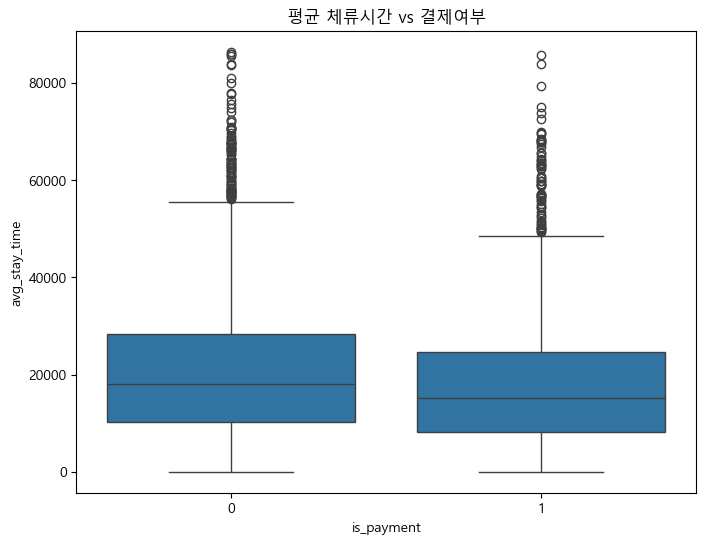

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x="is_payment", y="avg_stay_time", data=df)
plt.title("평균 체류시간 vs 결제여부")
plt.show()

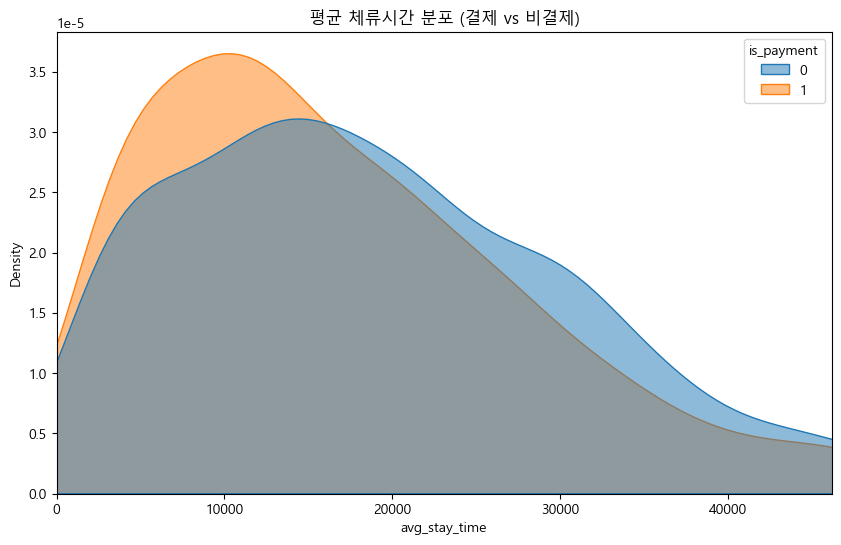

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="avg_stay_time", hue="is_payment", fill=True, common_norm=False, alpha=0.5)
plt.title("평균 체류시간 분포 (결제 vs 비결제)")
plt.xlim(0, df["avg_stay_time"].quantile(0.95))  # 이상치 잘라내기
plt.show()

- 큰 차이는 없지만 `비 결제자 그룹`이 `체험 기간 내 전반적으로 조금 더 오래 머물러 있는 특징`이 보임

- **단순히 체류 시간이 길다고 해서 결제 확률이 높아지지는 않는다.**

---
---

### 체험 시작 일자와 결제여부의 관계

In [19]:
df.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_date',
 'first_trial_covid_level',
 'start_trial_year',
 'start_trial_month',
 'start_trial_hour',
 'start_trial_day_of_week',
 'last_trial_date',
 'last_trial_covid_level',
 'final_trial_year',
 'final_trial_month',
 'final_trial_hour',
 'final_trial_day_of_week',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site',
 'subway_distance_m',
 'subway_walk_min']

   start_trial_year  is_payment
0              2021    0.383638
1              2022    0.399123
2              2023    0.330106
3              2024    0.000000


C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\954306977.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="start_trial_year", y="is_payment", data=df, estimator="mean", ci=None)


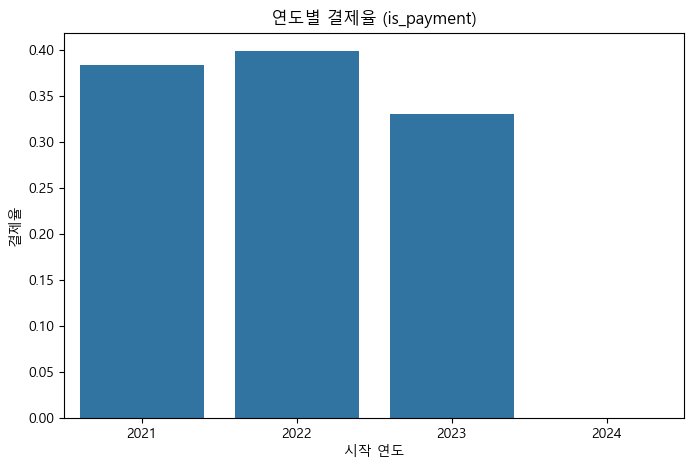

In [20]:
# 연도별 결제율 계산
year_payment_rate = df.groupby("start_trial_year")["is_payment"].mean().reset_index()

print(year_payment_rate)


plt.figure(figsize=(8,5))
sns.barplot(x="start_trial_year", y="is_payment", data=df, estimator="mean", ci=None)
plt.title("연도별 결제율 (is_payment)")
plt.ylabel("결제율")
plt.xlabel("시작 연도")
plt.show()

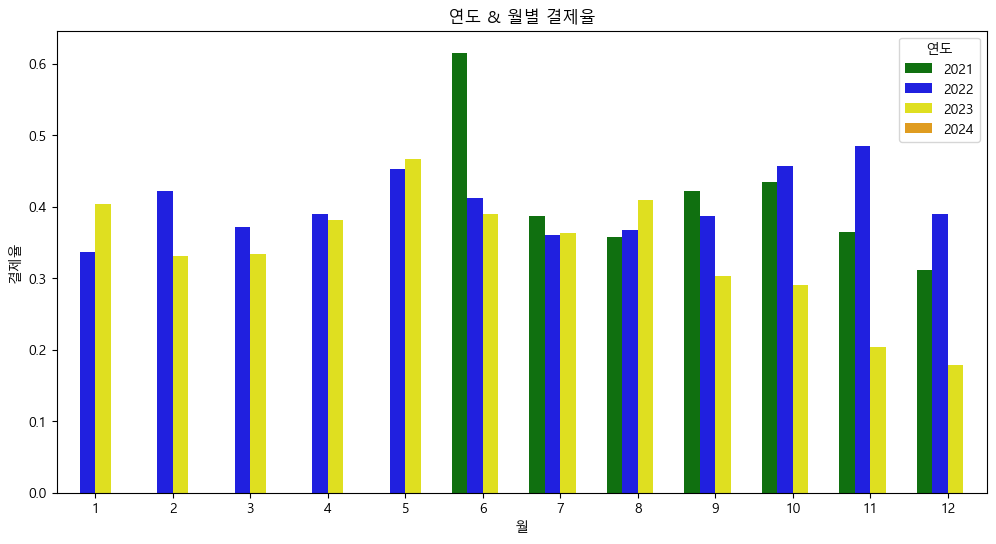

In [21]:
# 연도-월별 결제율 계산
monthly_rate = (
    df.groupby(["start_trial_year", "start_trial_month"])["is_payment"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    x="start_trial_month", 
    y="is_payment", 
    hue="start_trial_year", 
    data=monthly_rate,
    palette=["green", "blue", "yellow", "orange"]  # 초-파-노-주
)

plt.title("연도 & 월별 결제율")
plt.xlabel("월")
plt.ylabel("결제율")
plt.legend(title="연도")
plt.show()

---
---

### 코로나 단계와 결제여부와의 관계

In [22]:
df.columns.tolist()

['user_uuid',
 'last_site_id',
 'area_pyeong',
 'stay_time_second_total',
 'trial_day',
 'trial_gap',
 'first_trial_date',
 'first_trial_covid_level',
 'start_trial_year',
 'start_trial_month',
 'start_trial_hour',
 'start_trial_day_of_week',
 'last_trial_date',
 'last_trial_covid_level',
 'final_trial_year',
 'final_trial_month',
 'final_trial_hour',
 'final_trial_day_of_week',
 'check_in_total_count',
 'check_out_total_count',
 'is_payment',
 'avg_stay_time',
 'holiday_weekend',
 'other_site',
 'subway_distance_m',
 'subway_walk_min']

In [23]:
df.groupby("is_payment")[["first_trial_covid_level", "last_trial_covid_level"]].mean()

,first_trial_covid_level,last_trial_covid_level
is_payment,,
0,0.448903,0.445439
1,0.475719,0.469277


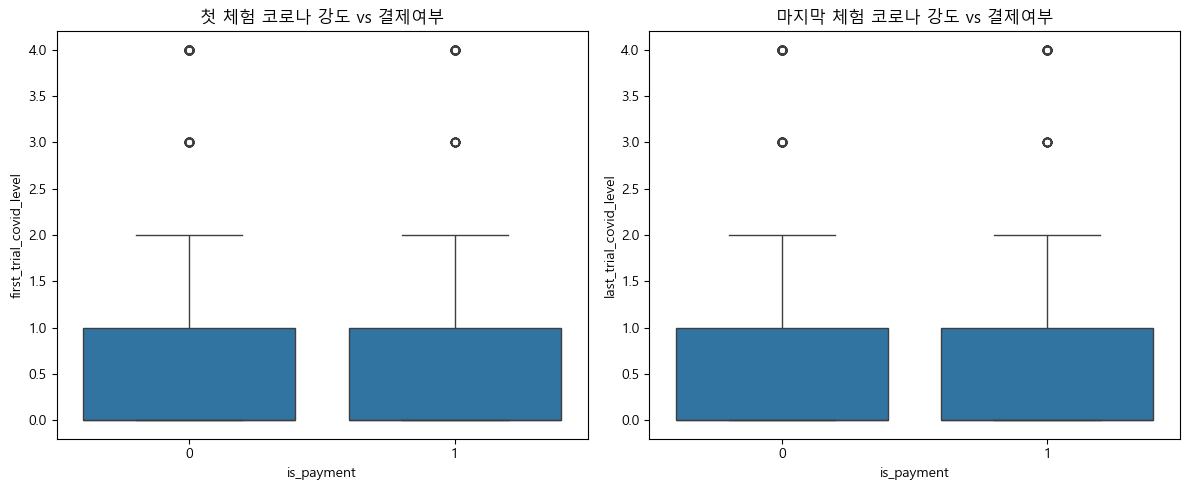

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="is_payment", y="first_trial_covid_level", data=df)
plt.title("첫 체험 코로나 강도 vs 결제여부")

plt.subplot(1,2,2)
sns.boxplot(x="is_payment", y="last_trial_covid_level", data=df)
plt.title("마지막 체험 코로나 강도 vs 결제여부")

plt.tight_layout()
plt.show()

In [25]:
covid_rate = (
    df.groupby("first_trial_covid_level")["is_payment"].mean().reset_index()
)
print(covid_rate)

   first_trial_covid_level  is_payment
0                        0    0.362030
1                        1    0.378018
2                        2    0.390374
3                        3    0.320755
4                        4    0.411765


C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\3510952156.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="first_trial_covid_level", y="is_payment", data=df, ci=None, color="steelblue")


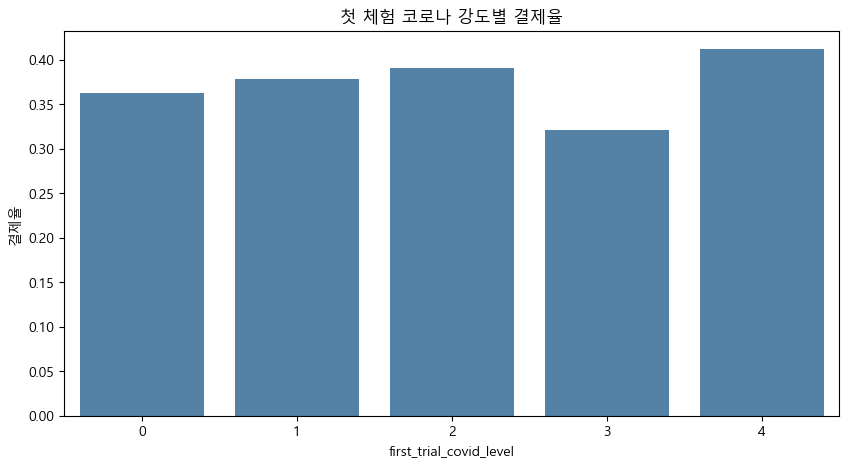

C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\3510952156.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="last_trial_covid_level", y="is_payment", data=df, ci=None, color="orange")


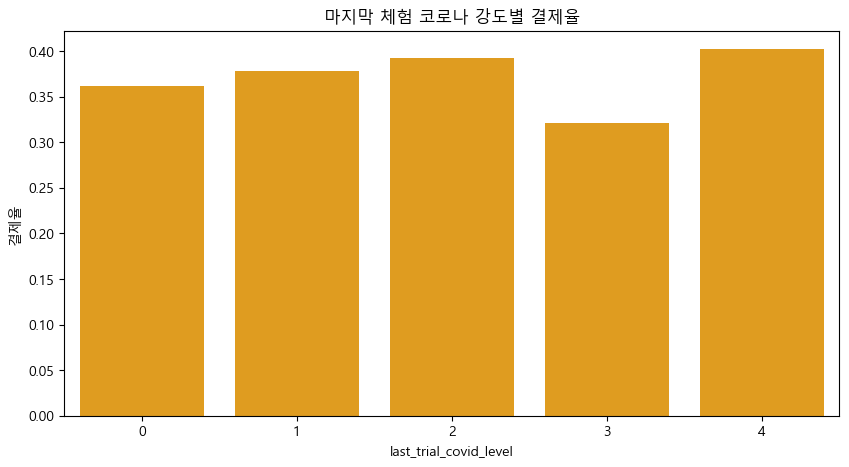

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x="first_trial_covid_level", y="is_payment", data=df, ci=None, color="steelblue")
plt.title("첫 체험 코로나 강도별 결제율")
plt.ylabel("결제율")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="last_trial_covid_level", y="is_payment", data=df, ci=None, color="orange")
plt.title("마지막 체험 코로나 강도별 결제율")
plt.ylabel("결제율")
plt.show()

- 코로나 강도와 결제여부와는 뚜렷한 관계는 없어 보인다.

---
---

### ◆ 체험 횟수와 결제 여부와의 관계

In [27]:
df.groupby("trial_day")["is_payment"].mean()

trial_day
1    0.307905
2    0.404722
3    0.442455
Name: is_payment, dtype: float64

In [28]:
df["trial_day"].value_counts()

trial_day
1    2530
2    1779
3    1173
Name: count, dtype: int64

C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\1298158257.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="trial_day", y="is_payment", data=df, ci=95)  # 95% 신뢰구간


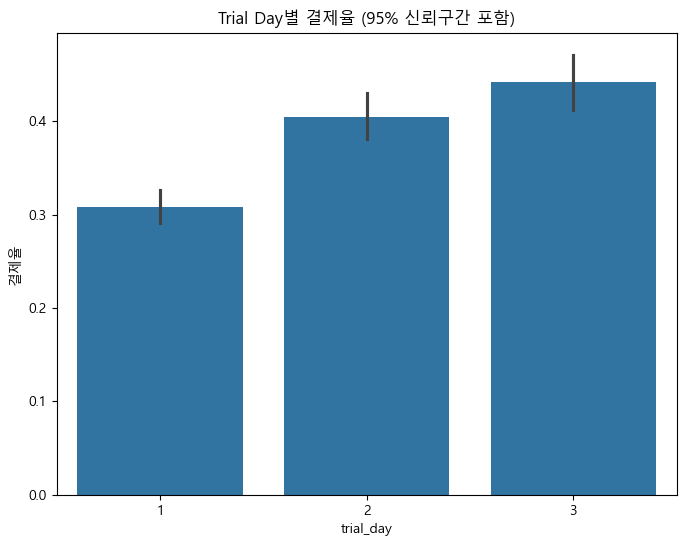

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x="trial_day", y="is_payment", data=df, ci=95)  # 95% 신뢰구간
plt.title("Trial Day별 결제율 (95% 신뢰구간 포함)")
plt.ylabel("결제율")
plt.show()

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df["trial_day"], df["is_payment"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2={chi2:.3f}, p-value={p:.4f}")

Chi2=77.549, p-value=0.0000


- 체험 일수가 늘어날수록 **결제율이 더 뚜렷하게 상승한다**
- **서비스를 경험 하면 할수록 결제율은 상승하는것으로 보여짐**

---
---

### ◆ 신청 즉시(`trial_gap 0 ~ 1일차`) 체험한 유저들의 trial_day 분포

In [31]:
df['trial_day'].value_counts()

trial_day
1    2530
2    1779
3    1173
Name: count, dtype: int64

In [32]:
df['trial_gap'].value_counts()

trial_gap
1    3213
0    1303
2     964
3       2
Name: count, dtype: int64

C:\Users\nuwba\AppData\Local\Temp\ipykernel_11824\2614996328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="trial_day", data=subset, palette="Blues")


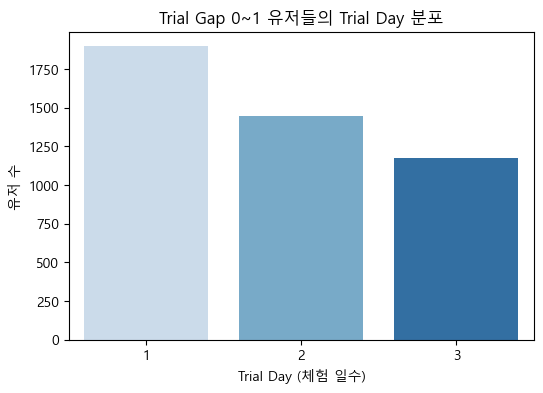

Trial Gap 0~1 유저들의 Trial Day 분포(%)
trial_day
1    0.419841
2    0.320416
3    0.259743
Name: proportion, dtype: float64


In [33]:
# trial_gap 0~1 유저만 필터링
subset = df[df["trial_gap"].isin([0,1])]

# trial_day 분포 (카운트)
plt.figure(figsize=(6,4))
sns.countplot(x="trial_day", data=subset, palette="Blues")
plt.title("Trial Gap 0~1 유저들의 Trial Day 분포")
plt.xlabel("Trial Day (체험 일수)")
plt.ylabel("유저 수")
plt.show()

# 비율 확인
dist = subset["trial_day"].value_counts(normalize=True).sort_index()
print("Trial Gap 0~1 유저들의 Trial Day 분포(%)")
print(dist)

- 신청 즉시 들어온 고객 중 **절반 이상은 3일 이상 체험을 이어가는 경향이 보임**
- `1일차만 사용 후 이탈하는 고객 층을 잡기 위한 전략이 필요해보임`

---
---

- ☆ 체험 기간이 길고 결제 안한 유저들 특징 찾아보기 (결제유저 보다 체류시간이 길고 입/출입 이력이 약 1회 정도 많음)
- ★ 지점별로 어떤 차이가 있는지(회사가 많은지, 등등)
- ★ 지역별 특성을 찾아보기*(가정한 지점별 근처 회사수, 교통수단, 인구밀집 등)
- **? 왜 trial_day 가 높으면 결제율이 높아지는지 원인 찾기 ?**

---
---

### 체험 기간이 길고 결제 안한 유저들 특징 찾아보기

In [36]:
# 조건 필터링
cond = (df["trial_day"] >= 2) & (df["is_payment"] == 0)
filtered = df[cond]

# row 수
row_count = len(filtered)

# 전체 데이터에서의 비율
ratio = row_count / len(df)

print("row 수:", row_count)
print("전체 데이터에서의 비율:", f"{ratio:.2%}")

row 수: 1713
전체 데이터에서의 비율: 31.25%


- 해당 유저들의 site 분포

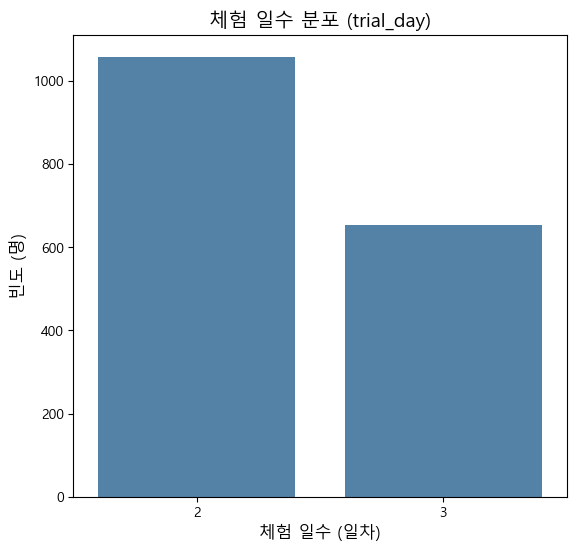

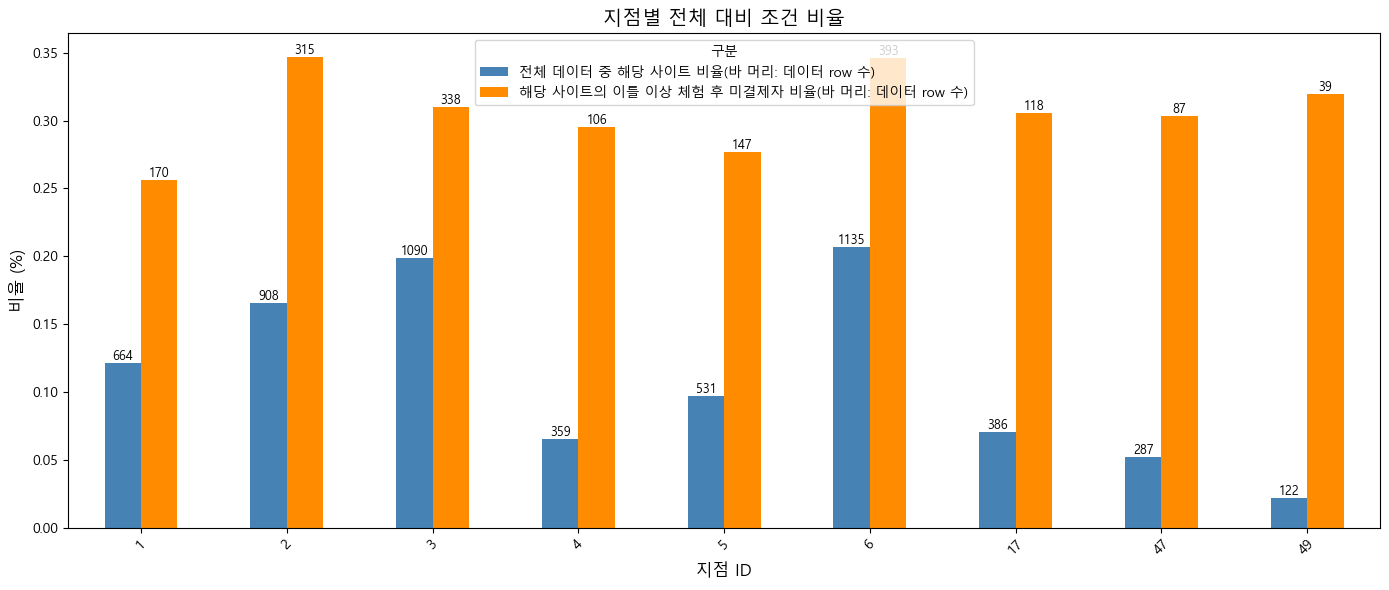

In [62]:
plt.figure(figsize=(14,6))

# trial_day 분포
plt.subplot(1, 2, 1)
sns.countplot(x="trial_day", data=filtered, color="steelblue")
plt.title("체험 일수 분포 (trial_day)", fontsize=14)
plt.xlabel("체험 일수 (일차)", fontsize=12)
plt.ylabel("빈도 (명)", fontsize=12)

# 전체 집계
site_all_counts = df['last_site_id'].value_counts().sort_index()
site_all_ratio = site_all_counts / len(df)

# 조건 집계 (site별 trial_day>=2 & is_payment==0 비율)
site_cond_counts = filtered['last_site_id'].value_counts().sort_index()
site_cond_ratio = site_cond_counts / site_all_counts

# 합치기
site_compare = pd.concat([site_all_ratio.rename("전체 데이터 중 해당 사이트 비율(바 머리: 데이터 row 수)"),
                          site_cond_ratio.rename("해당 사이트의 이틀 이상 체험 후 미결제자 비율(바 머리: 데이터 row 수)")], axis=1).fillna(0)

# 시각화
ax = site_compare.plot(kind="bar", figsize=(14,6), color=["steelblue", "darkorange"])
plt.title("지점별 전체 대비 조건 비율", fontsize=14)
plt.xlabel("지점 ID", fontsize=12)
plt.ylabel("비율 (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="구분")

# 5. 막대 위 데이터 수(label) 표시
for container, counts in zip(ax.containers, [site_all_counts, site_cond_counts]):
    ax.bar_label(container, labels=counts.values, label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()


- 파란색 바 = **전체 데이터**에서 해당 지점이 차지하는 비율
- 주황색 바 = n번 site에서 `(trial_day >= 2) & (is_payment == 0)` 체험일 수 길면서 돈 안낸 사람 비율
- 바 머리위 숫자 = 데이터의 row 수

- 지점 6, 2, 3
  - 주황색 비율이 상당히 높은것으로 보여짐 → 체험을 2일 이상 했는데도 결제로 이어지지 않는 고객이 존재
  - 해당 지점을 관찰하면 개선점을 찾을수도..? 아님 외부적인 요건인건가..?

- 지점 1, 4, 5
  - 파란색 대비 주황색이 상대적으로 낮음 → 결제 전환율이 양호한 지점


- 지점 47, 49
  - 전체 데이터 수가 적지만, 주황색 바가 꽤 높이 나옴 → 원인 조사 필요

---
---

### ◆미결제 그룹 특성파악

In [48]:
num_cols = ["stay_time_second_total", "check_in_total_count", "check_out_total_count"]

# 전체 기준: is_payment별 평균
overall = df.groupby("is_payment")[num_cols].mean()

# trial_day >= 2 & is_payment == 0 조건 평균
cond0 = df[(df["trial_day"] >= 2) & (df["is_payment"] == 0)][num_cols].mean()

# trial_day >= 2 & is_payment == 1 조건 평균
cond1 = df[(df["trial_day"] >= 2) & (df["is_payment"] == 1)][num_cols].mean()

print("조건 (trial_day >= 2 & is_payment == 0):\n", cond0, "\n")
print("조건 (trial_day >= 2 & is_payment == 1):\n", cond1)

조건 (trial_day >= 2 & is_payment == 0):
 stay_time_second_total    59949.509998
check_in_total_count          7.305896
check_out_total_count         7.113835
dtype: float64 

조건 (trial_day >= 2 & is_payment == 1):
 stay_time_second_total    50856.511298
check_in_total_count          6.386602
check_out_total_count         6.238902
dtype: float64


- 미결제 그룹(체험 2일이상)
    - 평균 체류 시간 : `약 17시간`
    - 평균 총 입실 횟수 : 약 7.3회
    - 평균 총 퇴실 횟수 : 약 7.1회

- 결제 그룹(체험 2일이상)
    - 평균 체류 시간 : `약 14시간`
    - 평균 총 입실 횟수 : 약 6.4회
    - 평균 총 퇴실 횟수 : 약 6.2회

**미 결제그룹이 약 3시간 정도 더 오래 머물렀음**   
그럼에도 결제로 이어지진 않았음.

- 서비스 불만족의 경우 : 체험을 충분히 해봤지만, 결제까지 이어지지 않음
- 체험 목적 전용 : 무료 체험만 쓰고 떠나려는 그룹(얌체족)
- 지점 특성 일 수도 있음 (사무실이 많이 없는 지역)

---
---

### ◇ 미결제 그룹의 site_id 비율

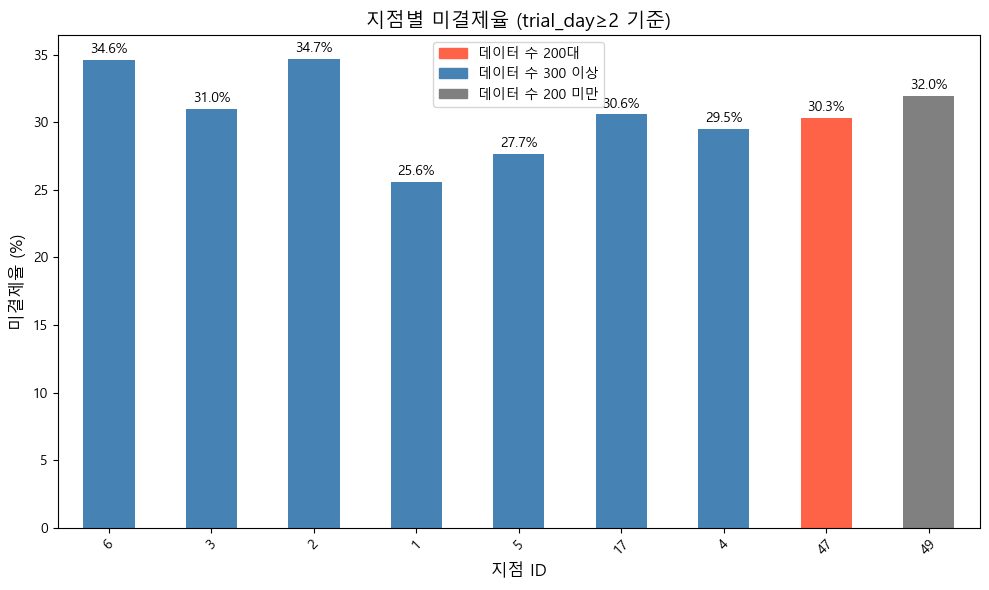

In [61]:
# 전체 사이트별 데이터 수
site_total = df['last_site_id'].value_counts()

# 미결제 그룹 (trial_day>=2 & is_payment==0)
non_payment = df[(df['trial_day'] >= 2) & (df["is_payment"] == 0)]
site_nonpay = non_payment['last_site_id'].value_counts()

# 미결제율 계산 (각 site별 비율)
site_ratio = (site_nonpay / site_total * 100).fillna(0)

# 색상 구분: 데이터 수 200대 vs 300 이상
colors = []
for site in site_ratio.index:
    if 200 <= site_total[site] < 300:
        colors.append("tomato")   # 200대
    elif site_total[site] >= 300:
        colors.append("steelblue")  # 300 이상
    else:
        colors.append("gray")     # 200 미만


# 바 그래프
plt.figure(figsize=(10,6))
bars = site_ratio.plot(kind="bar", color=colors)

plt.title("지점별 미결제율 (trial_day≥2 기준)", fontsize=14)
plt.xlabel("지점 ID", fontsize=12)
plt.ylabel("미결제율 (%)", fontsize=12)
plt.xticks(rotation=45)

# 바 위에 퍼센트 값 표시
for i, v in enumerate(site_ratio):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontsize=10)

# 범례 추가
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="tomato", label="데이터 수 200대")
blue_patch = mpatches.Patch(color="steelblue", label="데이터 수 300 이상")
gray_patch = mpatches.Patch(color="gray", label="데이터 수 200 미만")
plt.legend(handles=[red_patch, blue_patch, gray_patch])

plt.tight_layout()
plt.show()

In [ ]:
trial_day_2 = df[df["trial_day"] >= 2]

# site 47, 49 데이터 수 확인
site_47_count = (trial_day_2["last_site_id"] == 47).sum()
site_49_count = (trial_day_2["last_site_id"] == 49).sum()

print("site 47:", site_47_count)
print("site 49:", site_49_count)

site 47: 137
site 49: 70


In [59]:
# 조건 필터링
non_payment = df[(df["trial_day"] >= 2) & (df["is_payment"] == 0)]

# site 47, 49 데이터 수 확인
site_47_np_count = (non_payment["last_site_id"] == 47).sum()
site_49_np_count = (non_payment["last_site_id"] == 49).sum()

print("site 47:", site_47_np_count)
print("site 49:", site_49_np_count)

site 47: 87
site 49: 39


- 가정한 지점 기준
   - `왕십리` (site 6) / `서울대(폐점)` (site 3) / `석촌(폐점)` (site 2) 이 높은 비율을 차지

   - `정동본` (site 1) / `공덕` (site 17) / `일산` (site 4) 비교적 낮은 비율(**47, 49 데이터수 적어서 제외 / 5 폐점 구역 제외**)

---

### ◆ 가정 지역별 특징

- 왕십리 (site 6)
  - 왕십리역 기준 사무업보단 `먹거리·쇼핑 상권이 활성화 되있음`(대형 쇼핑몰, 전통시장, 대학가 상권 등)
  - 왕십리역 주변 `한양대/성동구청/성동구의회 등 공공기관들이 존재`
  - 통계지리정보서비스(SGIS) 기준 `성동구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
    - `왕십리역` : 13건
    - `한양대역` : 35건
    - `성수역` : 710건
  - 성수역에 사무직군의 비율이 몰려있음

- 서울대 (site 2)
  - `전형적인 대학교 상권과 주변 오피스텔 원룸이 다수 존재`
  - 2018년도에 `샤로수길이 뜨면서 먹자골목 상권 거래수 크게 증가`
  - `대기업의 판매점들이 다수 존재`하고 임대료가 매우 높음
  - 통계지리정보서비스(SGIS) 기준 `영등포구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
    - `서울대입구역`/`봉천역` : 54건
    - `신림역` : 41건
    - `사당역` : 19건
  - 사무직 자체가 적음

- 석촌 (site 3)
    - `카페·브런치·디저트 중심 상권이 발달(석촌호수/송리단길 영향)`
    - `주택가와 섞여있으며, 소규모 음식점, 브런치 카페등 생활 밀착형 상권`이 형성됨
    - 전체적으로 `주거·소매 중심 상권으로 이뤄져있으며`, 대형 사무용 빌딩보다 소형 상업시설 위주로 구성
    - 통계지리정보서비스(SGIS) 기준 `송파구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
       - `잠식역` : 269건
       - `송파나루역` : 45건
       - `문정역` : 362건
       - `석촌역` : 36건
     - 사무직 기반 수요가 적은 편

---

- 정동본 (site 1)
  - `상가건물들이 상당히 노후화 되어있음`
  - `테이크아웃 커피 전문점들이 굉장히 많음`
  - 통계지리정보서비스(SGIS) 기준 `중구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
    - `시청역` : 657건
    - `충무로역` : 162건
    - `청구역` : 29건 
    - `시청 vs 충무로` : 약 4.1배 많음
    - `시청 vs 청구` : 약 22.7배 많음
  - 위 통계로 보았을 때 사무·전문직들이 밀집되어있는 지역으로 볼 수 있음

- 공덕 (site 17)
  - `언론사·대기업 계열사 등 사무실 수요가 높은 직군 존재`
  - → 원룸·오피스텔 존재 `1 ~ 2인 창업자·프리랜서 수요 흡수`
  - 통계지리정보서비스(SGIS) 기준 `마포구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
      - `공덕역` : 263건 → **마포구 내에서 압도적으로 가장 높은 수치**
      - `마포역` : 39건
      - `망원역` : 63건
      - `합정역` : 49건
      - `홍대입구역` : 174건
      - `신촌·이대권` : 31건
      - `상암·디지털미디어시티`(DMC)역 : 126건
  - 위 통계로 보았을 때 사무·전문직들이 밀집되어있는 지역으로 볼 수 있음

- 일산 (site 4)
  - 주변에 **중소규모 오피스 빌딩·상가건물** 분포 → 소규모 스타트업·전문직 수요와 잘 맞음
  - 통계지리정보서비스(SGIS) 기준 `일산동구` 내 일자리(행정·사무직, IT 연구개발직, 법률직) 수 정보
      - `마두역 일대` : `179건`으로, 일산동구에서 가장 높은 수치
      - `정발산역(23건), 백마역(3건)` 대비 : 약 7.8배, 59.7배 많음
      - `일산역(2건)` 대비 : 약 89.5배 많음
  - **마두역 근처는 일산동구 내 사무직 기반 일자리의 중심지**로, 공유오피스 입지로서 경쟁력이 높음

---

## 고객 위주 EDA 진행

In [3]:
import pandas as pd

In [4]:
df2 = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\merged_user_data_2.csv")

df2

,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,final_trial_year,final_trial_month,final_trial_hour,final_trial_day_of_week,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,2021,6,22,2,1.0,1.0,0,6689.229446,0,0
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,2021,6,23,2,3.0,3.0,1,85811.532606,0,0
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,2021,6,19,2,3.0,3.0,0,14505.346647,0,0
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,2021,6,17,2,1.0,1.0,0,13084.318509,0,0
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,2021,7,16,3,1.0,1.0,0,7617.656856,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,2024,1,23,0,12.0,12.0,1,29221.687353,1,1
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,3.0,3.0,1,3359.131767,1,1
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,2024,1,18,0,6.0,6.0,0,16514.422450,1,0
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,2024,1,18,0,3.0,3.0,0,11977.273214,1,0


### 그룹 나눠서 보기


In [5]:
df2['trial_day'].value_counts()

trial_day
1    2530
2    1779
3    1173
Name: count, dtype: int64

In [7]:
# trial_day 그룹 나누기
group1 = df2[df2['trial_day'] == 1]
group2 = df2[df2['trial_day'] == 2]
group3 = df2[df2['trial_day'] == 3]

print("Group1 (1일차 유저):", len(group1))
print("Group2 (2일차 유저):", len(group2))
print("Group3 (3일차 유저):", len(group3))

Group1 (1일차 유저): 2530
Group2 (2일차 유저): 1779
Group3 (3일차 유저): 1173


In [18]:
df2['trial_gap'].value_counts()

trial_gap
1    3213
0    1303
2     964
3       2
Name: count, dtype: int64

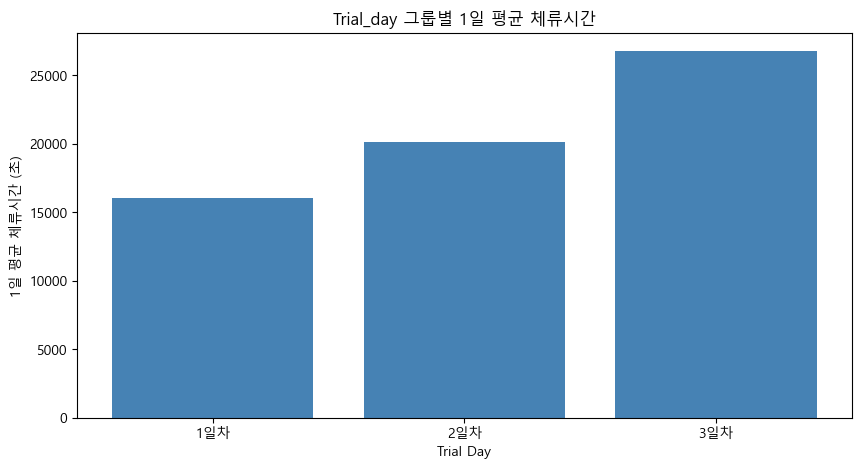

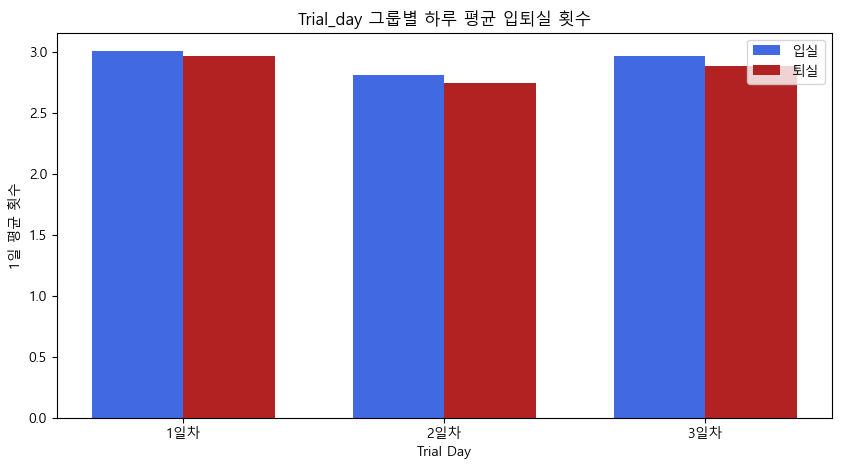

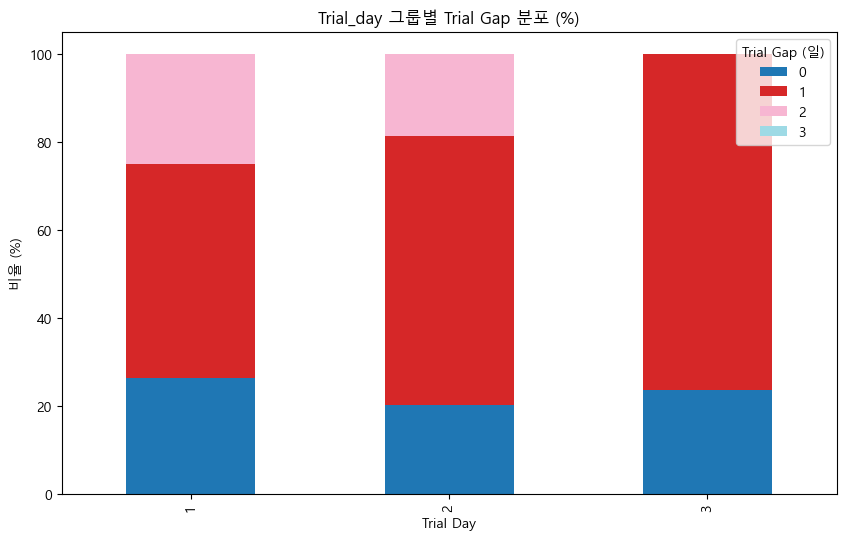

In [ ]:
# trial_day 그룹별 평균 집계
group_stats = df2.groupby("trial_day").agg({
    "avg_stay_time": "mean",
    "check_in_total_count": "mean",
    "check_out_total_count": "mean",
    "trial_gap": "mean"
}).reset_index()


# 평균 체류시간 (Bar plot)

# 하루 평균 이용시간 = 총 체류시간 / trial_day
df2["stay_time_per_day"] = df2["stay_time_second_total"] / df2["trial_day"]

# trial_day 그룹별 하루 평균 체류시간 계산
group_stats_per_day = df2.groupby("trial_day")["stay_time_per_day"].mean().reset_index()

# 시각화
plt.figure(figsize=(10,5))
plt.bar(group_stats_per_day["trial_day"], group_stats_per_day["stay_time_per_day"], color="steelblue")
plt.title("Trial_day 그룹별 1일 평균 체류시간")
plt.xlabel("Trial Day")
plt.ylabel("1일 평균 체류시간 (초)")
plt.xticks([1, 2, 3], ["1일차", "2일차", "3일차"])
plt.show()


# 평균 입퇴실 기록 (이중 Bar plot)

# 하루 기준 입퇴실 횟수 계산
df2["check_in_per_day"] = df2["check_in_total_count"] / df2["trial_day"]
df2["check_out_per_day"] = df2["check_out_total_count"] / df2["trial_day"]

# trial_day 그룹별 하루 평균 입퇴실 횟수
group_inout_per_day = df2.groupby("trial_day")[["check_in_per_day", "check_out_per_day"]].mean().reset_index()

# 시각화
x = group_inout_per_day["trial_day"]
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, group_inout_per_day["check_in_per_day"], width=width, color="royalblue", label="입실")
plt.bar(x + width/2, group_inout_per_day["check_out_per_day"], width=width, color="firebrick", label="퇴실")
plt.title("Trial_day 그룹별 하루 평균 입퇴실 횟수")
plt.xlabel("Trial Day")
plt.ylabel("1일 평균 횟수")
plt.xticks([1, 2, 3], ["1일차", "2일차", "3일차"])
plt.legend()
plt.show()

# trial_day × trial_gap 교차 테이블
gap_dist = pd.crosstab(df2["trial_day"], df2["trial_gap"], normalize="index") * 100

# 시각화 (누적 막대그래프)
gap_dist.plot(kind="bar", stacked=True, figsize=(10,6), cmap="tab20")
plt.title("Trial_day 그룹별 Trial Gap 분포 (%)")
plt.xlabel("Trial Day")
plt.ylabel("비율 (%)")
plt.legend(title="Trial Gap (일)")
plt.show()

In [21]:
# 3일차 유저만 필터링
df_3day = df2[df2["trial_day"] == 3]

# 결제 그룹 (is_payment = 1)
df_3day_paid = df_3day[df_3day["is_payment"] == 1]

# 미결제 그룹 (is_payment = 0)
df_3day_unpaid = df_3day[df_3day["is_payment"] == 0]

print("3일차 전체 유저 수:", len(df_3day))
print("결제 그룹:", len(df_3day_paid))
print("미결제 그룹:", len(df_3day_unpaid))

3일차 전체 유저 수: 1173
결제 그룹: 519
미결제 그룹: 654


In [27]:
df_2day = df2[df2["trial_day"] == 2]

# 결제 그룹 (is_payment = 1)
df_2day_paid = df_2day[df_2day["is_payment"] == 1]

# 미결제 그룹 (is_payment = 0)
df_2day_unpaid = df_2day[df_2day["is_payment"] == 0]

print("2일차 전체 유저 수:", len(df_2day))
print("결제 그룹:", len(df_2day_paid))
print("미결제 그룹:", len(df_2day_unpaid))

2일차 전체 유저 수: 1779
결제 그룹: 720
미결제 그룹: 1059


In [26]:
df_1day = df2[df2["trial_day"] == 1]

# 결제 그룹 (is_payment = 1)
df_1day_paid = df_1day[df_1day["is_payment"] == 1]

# 미결제 그룹 (is_payment = 0)
df_1day_unpaid = df_1day[df_1day["is_payment"] == 0]

print("1일차 전체 유저 수:", len(df_1day))
print("결제 그룹:", len(df_1day_paid))
print("미결제 그룹:", len(df_1day_unpaid))


1일차 전체 유저 수: 2530
결제 그룹: 779
미결제 그룹: 1751


| Trial Day | 전체 유저 수 | 결제 그룹 | 미결제 그룹 |
| --------- | ------- | ----- | ------ |
| **1일차**   | 2,530   | 779   | 1,751  |
| **2일차**   | 1,779   | 720   | 1,059  |
| **3일차**   | 1,173   | 519   | 654    |

3일차 결제 그룹 평균 체류시간: 71722.65415131407
3일차 미결제 그룹 평균 체류시간: 87078.23108419112


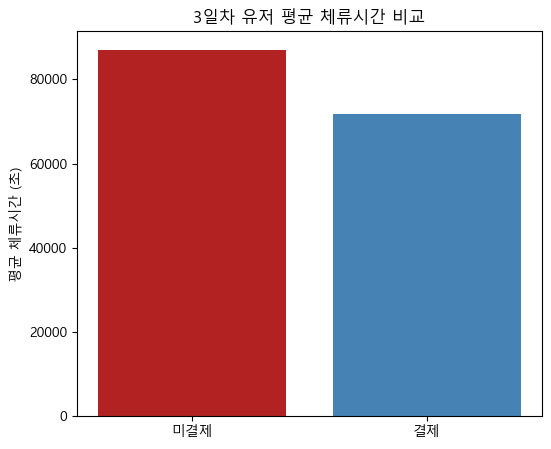

In [ ]:
# 3일차 유저 평균 체류시간 비교
avg_stay_paid_3 = df_3day_paid["stay_time_second_total"].mean()
avg_stay_unpaid_3 = df_3day_unpaid["stay_time_second_total"].mean()

print("3일차 결제 그룹 평균 체류시간:", avg_stay_paid_3)
print("3일차 미결제 그룹 평균 체류시간:", avg_stay_unpaid_3)

# 시각화
plt.figure(figsize=(6,5))
plt.bar(["미결제", "결제"], 
        [avg_stay_unpaid_3, avg_stay_paid_3], 
        color=["firebrick", "steelblue"])
plt.title("3일차 유저 총 평균 체류시간 비교")
plt.ylabel("평균 체류시간 (초)")
plt.show()

2일차 결제 그룹 평균 체류시간: 35815.499991793055
2일차 미결제 그룹 평균 체류시간: 43195.79555936638


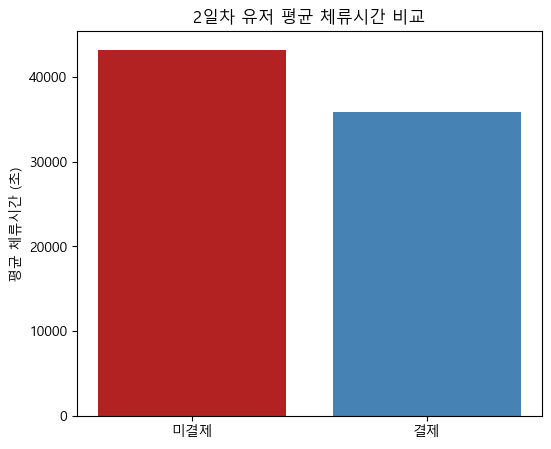

In [ ]:
# 2일차 유저 평균 체류시간 비교
avg_stay_paid_2 = df_2day_paid["stay_time_second_total"].mean()
avg_stay_unpaid_2 = df_2day_unpaid["stay_time_second_total"].mean()

print("2일차 결제 그룹 평균 체류시간:", avg_stay_paid_2)
print("2일차 미결제 그룹 평균 체류시간:", avg_stay_unpaid_2)

# 시각화
plt.figure(figsize=(6,5))
plt.bar(["미결제", "결제"], 
        [avg_stay_unpaid_2, avg_stay_paid_2], 
        color=["firebrick", "steelblue"])
plt.title("2일차 유저 총 평균 체류시간 비교")
plt.ylabel("평균 체류시간 (초)")
plt.show()

1일차 결제 그룹 평균 체류시간: 14649.770629456996
1일차 미결제 그룹 평균 체류시간: 16683.86489796231


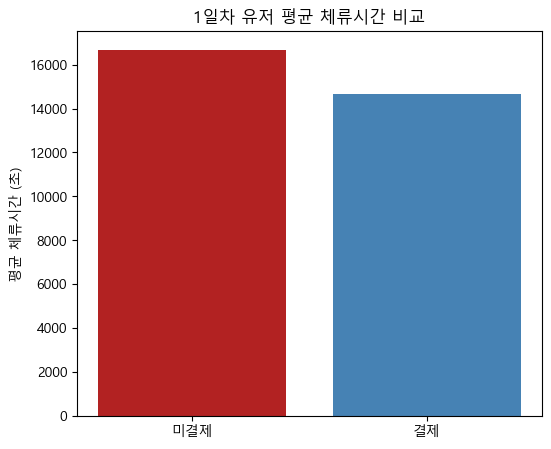

In [ ]:
# 1일차 유저 평균 체류시간 비교
avg_stay_paid = df_1day_paid["stay_time_second_total"].mean()
avg_stay_unpaid = df_1day_unpaid["stay_time_second_total"].mean()

print("1일차 결제 그룹 평균 체류시간:", avg_stay_paid)
print("1일차 미결제 그룹 평균 체류시간:", avg_stay_unpaid)

# 시각화
plt.figure(figsize=(6,5))
plt.bar(["미결제", "결제"], 
        [avg_stay_unpaid, avg_stay_paid], 
        color=["firebrick", "steelblue"])
plt.title("1일차 유저 총 평균 체류시간 비교")
plt.ylabel("평균 체류시간 (초)")
plt.show()

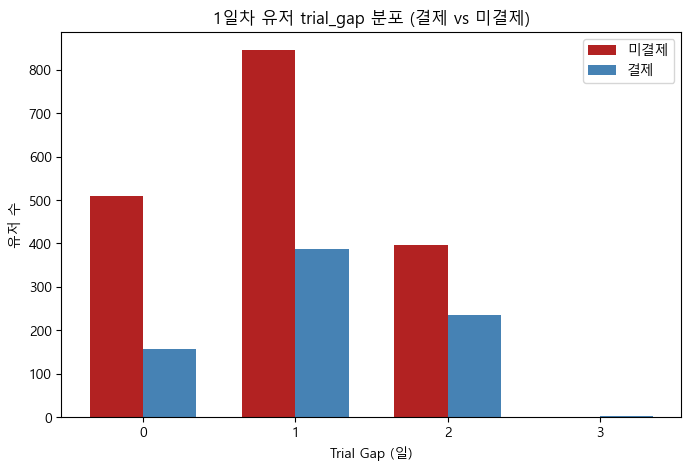

In [ ]:
# 1일차 trial_gap 분포 확인

# 모든 trial_gap 값의 전체 집합 생성
all_gaps = sorted(df_1day["trial_gap"].unique())

# 결제/미결제 그룹 분포를 reindex 해서 빈 값은 0으로 채움
gap_paid = df_1day_paid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)
gap_unpaid = df_1day_unpaid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)

# 시각화
x = range(len(all_gaps))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], gap_unpaid.values, width=width, color="firebrick", label="미결제")
plt.bar([i + width/2 for i in x], gap_paid.values, width=width, color="steelblue", label="결제")

plt.xticks(x, all_gaps)
plt.title("1일차 유저 trial_gap 분포 (결제 vs 미결제)")
plt.xlabel("Trial Gap (일)")
plt.ylabel("유저 수")
plt.legend()
plt.show()

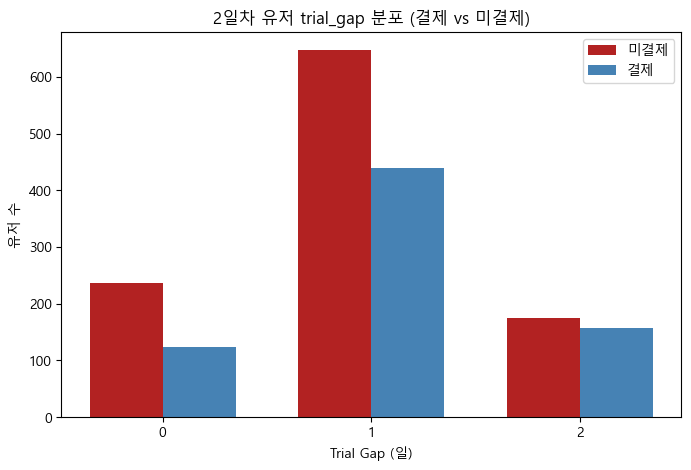

In [42]:
# 2일차 trial_gap 분포 확인

# 모든 trial_gap 값의 전체 집합 생성
all_gaps = sorted(df_2day["trial_gap"].unique())

# 결제/미결제 그룹 분포를 reindex 해서 빈 값은 0으로 채움
gap_paid = df_2day_paid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)
gap_unpaid = df_2day_unpaid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)

# 시각화
x = range(len(all_gaps))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], gap_unpaid.values, width=width, color="firebrick", label="미결제")
plt.bar([i + width/2 for i in x], gap_paid.values, width=width, color="steelblue", label="결제")

plt.xticks(x, all_gaps)
plt.title("2일차 유저 trial_gap 분포 (결제 vs 미결제)")
plt.xlabel("Trial Gap (일)")
plt.ylabel("유저 수")
plt.legend()
plt.show()

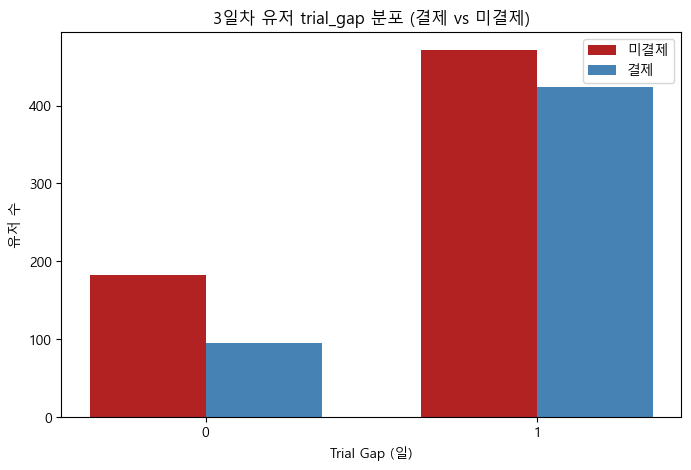

In [43]:
# 3일차 trial_gap 분포 확인

# 모든 trial_gap 값의 전체 집합 생성
all_gaps = sorted(df_3day["trial_gap"].unique())

# 결제/미결제 그룹 분포를 reindex 해서 빈 값은 0으로 채움
gap_paid = df_3day_paid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)
gap_unpaid = df_3day_unpaid["trial_gap"].value_counts().reindex(all_gaps, fill_value=0)

# 시각화
x = range(len(all_gaps))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], gap_unpaid.values, width=width, color="firebrick", label="미결제")
plt.bar([i + width/2 for i in x], gap_paid.values, width=width, color="steelblue", label="결제")

plt.xticks(x, all_gaps)
plt.title("3일차 유저 trial_gap 분포 (결제 vs 미결제)")
plt.xlabel("Trial Gap (일)")
plt.ylabel("유저 수")
plt.legend()
plt.show()

In [30]:
# first_trial_date를 날짜 타입으로 변환
df2["first_trial_date"] = pd.to_datetime(df2["first_trial_date"])

# 신청일 계산 (first_trial_date - trial_gap)
df2["register_date"] = df2["first_trial_date"] - pd.to_timedelta(df2["trial_gap"], unit="D")

# 확인
df2


,user_uuid,last_site_id,area_pyeong,stay_time_second_total,trial_day,trial_gap,first_trial_date,first_trial_covid_level,start_trial_year,start_trial_month,...,check_in_total_count,check_out_total_count,is_payment,avg_stay_time,holiday_weekend,other_site,stay_time_per_day,check_in_per_day,check_out_per_day,register_date
0,57521fee-05a3-4d93-9e22-9475a9740c19,3,150,6689.229446,1,0,2021-06-30,4,2021,6,...,1.0,1.0,0,6689.229446,0,0,6689.229446,1.000000,1.000000,2021-06-30
1,cc8ac908-3463-434c-8b4b-369d19f0e749,3,150,85811.532606,1,3,2021-06-30,4,2021,6,...,3.0,3.0,1,85811.532606,0,0,85811.532606,3.000000,3.000000,2021-06-27
2,25034325-b30f-4728-8475-4e9e2bceea5f,4,100,14505.346647,1,0,2021-06-30,4,2021,6,...,3.0,3.0,0,14505.346647,0,0,14505.346647,3.000000,3.000000,2021-06-30
3,79e6b258-7d99-4c3c-85b2-fd954da86b83,3,150,13084.318509,1,0,2021-06-30,4,2021,6,...,1.0,1.0,0,13084.318509,0,0,13084.318509,1.000000,1.000000,2021-06-30
4,42360a06-abb0-4b3f-8c76-dfaadd0034ea,2,100,7617.656856,1,1,2021-07-01,4,2021,7,...,1.0,1.0,0,7617.656856,0,0,7617.656856,1.000000,1.000000,2021-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477,516c8142-ae8d-4c6f-85d9-2025c14fbd33,6,150,87665.062060,3,0,2023-12-30,0,2023,12,...,12.0,12.0,1,29221.687353,1,1,29221.687353,4.000000,4.000000,2023-12-30
5478,d16cd121-9802-4880-8879-2eaf09fe99c5,4,100,6718.263533,2,0,2023-12-30,0,2023,12,...,3.0,3.0,1,3359.131767,1,1,3359.131766,1.500000,1.500000,2023-12-30
5479,06bbc34a-80ad-4fe7-af86-353204eda243,47,50,33028.844900,2,0,2023-12-30,0,2023,12,...,6.0,6.0,0,16514.422450,1,0,16514.422450,3.000000,3.000000,2023-12-30
5480,aa4773c8-dbc9-4c80-849b-1ab8d1db7bda,3,150,11977.273214,1,2,2024-01-01,0,2024,1,...,3.0,3.0,0,11977.273214,1,0,11977.273214,3.000000,3.000000,2023-12-30


### 퍼널 분석

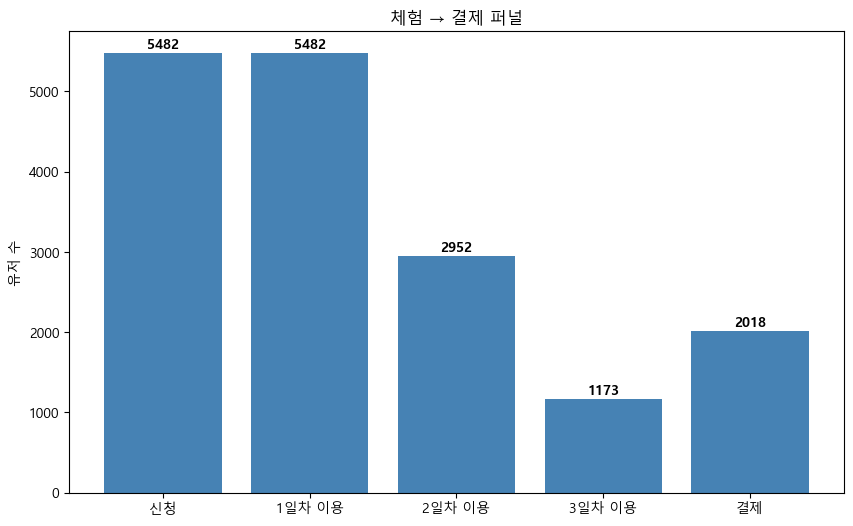

In [31]:
# 단계별 유저 수 집계
funnel_counts = {
    "신청": len(df2["user_uuid"].unique()),                    # 전체 신청자
    "1일차 이용": len(df2[df2["trial_day"] >= 1]["user_uuid"].unique()),
    "2일차 이용": len(df2[df2["trial_day"] >= 2]["user_uuid"].unique()),
    "3일차 이용": len(df2[df2["trial_day"] >= 3]["user_uuid"].unique()),
    "결제": len(df2[df2["is_payment"] == 1]["user_uuid"].unique())
}

# 데이터 준비
stages = list(funnel_counts.keys())
values = list(funnel_counts.values())

# 퍼널 그래프 (막대형)
plt.figure(figsize=(10,6))
plt.bar(stages, values, color="steelblue")
plt.title("체험 → 결제 퍼널")
plt.ylabel("유저 수")

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha="center", fontweight="bold")

plt.show()

---

### 결제 가능성이 높은 그룹 특징
- 2~3일차까지 잔존하는 유저
- gap=1~2일을 두고 체험을 계획적으로 시작한 유저
- 짧게라도 써보고 필요성을 바로 느껴 결제하는 유저

---
---

### trial_day == 1 인 그룹 특성
- Trial Gap 분포
  - 미결제 그룹은 gap=0,1에 많이 몰려 있음 → 신청 즉시/하루 뒤에 써보고 그만두는 경향
  - 결제 그룹은 gap=1~2에도 꽤 분포 → 약간 텀을 두고 체험 시작한 사람들이 결제로 이어질 확률 ↑

- 평균 체류시간 (결제 vs 미결제, 1일차 한정)
  - 미결제 그룹의 체류시간이 오히려 더 김 (무료 체험만 길게 쓰고 떠나는 패턴 존재)
  - 결제 그룹은 상대적으로 짧지만 “필요성 확인 후 빠른 결제” 가능성
-------------------------------------------------
- trial_gap=0인 즉시 체험 유저: 호기심만 채우고 쉽게 이탈
- 장시간 머물렀음에도 미결제: 무료 체험만 활용하는 유저층 존재(얌체족, 먹튀)  
**- ★ 온보딩/첫날 경험 부족: 첫날에 결제까지 이어지지 않으면 2일차에 돌아오지 않을 확률 ↑**

---
---

### trial_day == 2 인 그룹 특성
- Trial Gap 분포
  - 결제/미결제 모두 gap=1이 가장 많음
  - **체험 전날 신청 후 다음 날 이용한 고객층이 결제로 이어지는 경우가 많음** → **보통 수순이라고 생각함**
  
- 평균 체류시간
  - 미결제 그룹이 오히려 더 오래 머무름 (~43,000초 vs 36,000초)
  - 1일차와 동일하게 “`무료 체험만 길게 활용하는 층`” 존재
  - 결제 그룹은 비교적 짧은 시간 체험 → 필요성 확인 후 결제 의사 결정
  
- Trial Day별 1일 평균 체류시간
  - 2일차 유저는 1일차보다 평균 체류시간 ↑
  - 남아있는 사람들은 점점 더 공간 활용도가 커짐
  - 이탈자는 빠르게 나가고, 잔존자는 점점 충성도가 높아지는 구조
-------------------------------------------------
- 2일차에서도 결제 여부는 “`이용시간`”과 비례하지 않음
- gap=1~2의 계획적 방문자가 결제율 높음  
**- ★체험 지속성(2일차 이상) 자체가 결제 확률을 높이는 요인 → 체류시간이 길수록 서비스에 좋은 경험으로 남는 고객 → 충성도 ↑**

----------------------------------------------------------
----------------------------------------------------------

### trial_day == 3 인 그룹 특성

- Trial Gap 분포
  - 결제/미결제 모두 gap=1이 절대 다수
  - gap=0(신청 즉시 방문)은 상대적으로 비율이 낮고, 이 그룹에서는 미결제 비중이 더 높음
  - **즉, 3일차까지 도달한 유저 중에서는 전날 신청 후 다음 날 이용한 고객층이 결제로 이어지는 경우가 많음** → **마찬가지로 보통 수순이라고 생각함**

- 평균 체류시간
  - 미결제 그룹이 더 오래 머무름 (~86,000초 vs ~71,000초)
  - 1일차, 2일차와 동일하게 체류시간이 길다고 해서 **결제로 이어지지 않는다는 패턴이 유지**
  - 결제 그룹은 상대적으로 짧게 써도 **“필요성 확신 → 결제”로 이어짐**

- Trial Day별 1일 평균 체류시간
  - 1일차 → 2일차 → 3일차 순으로 증가 (약 16,000초 → 20,000초 → 27,000초)
  - **즉, 남아있는 유저들은 점점 더 많이 쓰면서 충성도가 강화되는 모습**

- 결제 전환율
  - 3일차 전체 1,173명 중 519명이 결제 → 약 44% 전환
  - **trial_day == 3 가 1일차·2일차 대비 결제율이 가장 높음**
  - **하지만 3일차까지 오는 유저 자체가 소수라서 전체 규모는 작음**
-------------------------------------------------
- 충성도 높은 소수 : 3일차까지 오는 유저는 이미 몰입도가 높음
- 미결제 그룹도 평균 체류시간이 상당히 길음
- “무료로 최대한 뽑아쓰고 결제 안 하는 층”이 3일차에도 여전히 존재(얌체족, 먹튀)
- **즉시 시작(gap=0)한 그룹보다 gap=1을 둔 그룹에서 결제가 더 잘 일어남**

---
---
---

trial_day == 1 인 유저 내 trial_gap 0 ~ 1 그룹 , 2 ~ 3 그룹 분리
- 0 ~ 1그룹 : 체험 기간 내 온 사람
- 2 ~ 3그룹 : 체험 기간 종료 직전 하루만 사용해본 사람

In [44]:
# 1일차 유저만 추출
df_day1 = df2[df2["trial_day"] == 1]

# 그룹 분리
group_01 = df_day1[df_day1["trial_gap"].isin([0, 1])]  # 즉시 또는 다음날 방문
group_23 = df_day1[df_day1["trial_gap"].isin([2, 3])]  # 체험 종료 직전 방문

print("0~1 그룹 유저 수:", len(group_01))
print("2~3 그룹 유저 수:", len(group_23))

# 비율 확인
print("0~1 그룹 비율:", len(group_01) / len(df_day1) * 100, "%")
print("2~3 그룹 비율:", len(group_23) / len(df_day1) * 100, "%")


0~1 그룹 유저 수: 1896
2~3 그룹 유저 수: 634
0~1 그룹 비율: 74.9407114624506 %
2~3 그룹 비율: 25.059288537549406 %


0~1 그룹 평균 체류시간: 16375.726631063291
2~3 그룹 평균 체류시간: 15106.058460856468


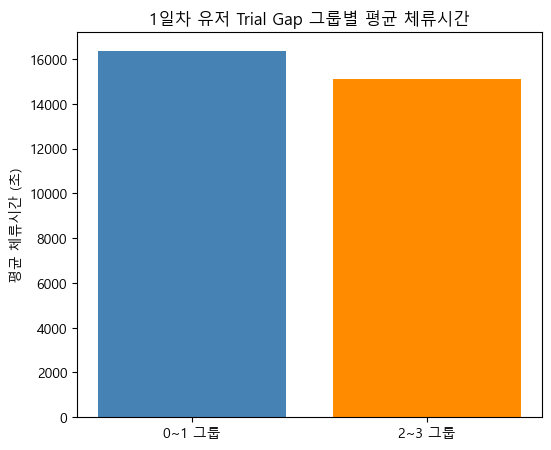

In [45]:
# 각 그룹 평균 체류시간 계산
avg_stay_01 = group_01["stay_time_second_total"].mean()
avg_stay_23 = group_23["stay_time_second_total"].mean()

print("0~1 그룹 평균 체류시간:", avg_stay_01)
print("2~3 그룹 평균 체류시간:", avg_stay_23)

# 시각화
plt.figure(figsize=(6,5))
plt.bar(["0~1 그룹", "2~3 그룹"],
        [avg_stay_01, avg_stay_23],
        color=["steelblue", "darkorange"])
plt.title("1일차 유저 Trial Gap 그룹별 평균 체류시간")
plt.ylabel("평균 체류시간 (초)")
plt.show()

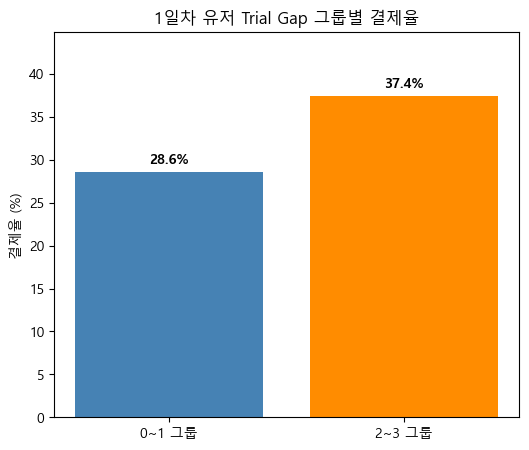

In [ ]:
# 결제 건수 및 결제율 계산
paid_01 = group_01[group_01["is_payment"] == 1].shape[0]
paid_23 = group_23[group_23["is_payment"] == 1].shape[0]

total_01 = group_01.shape[0]
total_23 = group_23.shape[0]

rate_01 = paid_01 / total_01 * 100
rate_23 = paid_23 / total_23 * 100

# 시각화
plt.figure(figsize=(6,5))
bars = plt.bar(["0~1 그룹", "2~3 그룹"], [rate_01, rate_23],
        color=["steelblue", "darkorange"])

plt.title("1일차 유저 Trial Gap 그룹별 결제율")
plt.ylabel("결제율 (%)")

# 각 바 위에 수치 라벨 표시
for bar, rate in zip(bars, [rate_01, rate_23]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{rate:.1f}%", ha="center", fontweight="bold")

plt.ylim(0, max(rate_01, rate_23) * 1.2)
plt.show()

In [50]:
from scipy.stats import chi2_contingency

# 교차표 만들기
contingency_table = pd.DataFrame({
    "결제": [
        group_01[group_01["is_payment"] == 1].shape[0],
        group_23[group_23["is_payment"] == 1].shape[0]
    ],
    "미결제": [
        group_01[group_01["is_payment"] == 0].shape[0],
        group_23[group_23["is_payment"] == 0].shape[0]
    ]
}, index=["0~1 그룹", "2~3 그룹"])

print("교차표:")
print(contingency_table)

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\n카이제곱 통계량:", chi2)
print("자유도:", dof)
print("p-value:", p)

교차표:
         결제   미결제
0~1 그룹  542  1354
2~3 그룹  237   397

카이제곱 통계량: 16.83685820681525
자유도: 1
p-value: 4.0734420162381544e-05


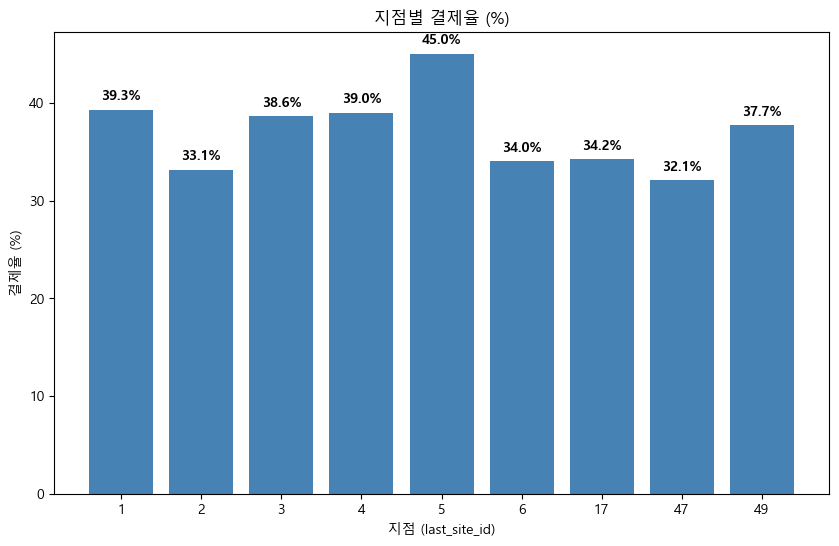

In [51]:
# 지점별 결제율 계산
site_payment = df2.groupby("last_site_id")["is_payment"].mean() * 100
site_count = df2["last_site_id"].value_counts()

# 그래프
plt.figure(figsize=(10,6))
bars = plt.bar(site_payment.index.astype(str), site_payment.values, color="steelblue")

plt.title("지점별 결제율 (%)")
plt.xlabel("지점 (last_site_id)")
plt.ylabel("결제율 (%)")

# 각 바 위에 결제율 표시
for bar, rate in zip(bars, site_payment.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{rate:.1f}%", ha="center", fontweight="bold")

plt.show()

In [52]:
from scipy.stats import chi2_contingency

# 지점별 결제/미결제 교차표
site_table = pd.crosstab(df2["last_site_id"], df2["is_payment"])

print("교차표:")
print(site_table)

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(site_table)

print("\n카이제곱 통계량:", chi2)
print("자유도:", dof)
print("p-value:", p)

교차표:
is_payment      0    1
last_site_id          
1             403  261
2             607  301
3             669  421
4             219  140
5             292  239
6             749  386
17            254  132
47            195   92
49             76   46

카이제곱 통계량: 32.43030668142754
자유도: 8
p-value: 7.797807106316638e-05
